In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import functions as fc
import importlib
importlib.reload(fc)

<module 'functions' from 'c:\\mha\\scripts_ambiental\\scripts_ipynb\\functions.py'>

##**1. Carga de Datos**

**Variables globales de las rutas necesarias**

Lectura del archivo consolidado (años 2023-2024-2025) se realiza luego del script que accede a las bases de datos de SQL (este Script no se encuentra en Google Colab) y lectura de Consumos de gas consolidados por MES

In [2]:
# df_Tostion_Mes = r'G:\.shortcut-targets-by-id\11pRq2eSspqJd86txF6wc2_q362MdeLLp\Ciclo_Mejora_Tostion\Datos\Historicos_MES\Detalle_TostionMDE_2023_2024_2025_MES.csv' #ruta original
df_Tostion_Mes = r'\\10.28.5.232\s3-1colcafeci-servicios-jtc\TPM\Colcafé Formularios\BD Ind Tostion\Historicos_MES\Detalle_TostionMDE_2023_2024_2025_MES.csv'

# df_Tostion_MES_totales = r'G:\.shortcut-targets-by-id\11pRq2eSspqJd86txF6wc2_q362MdeLLp\Ciclo_Mejora_Tostion\Datos\Historicos_MES\Consumos_MES.xlsx' #ruta original
df_Tostion_MES_totales = r'\\10.28.5.232\s3-1colcafeci-servicios-jtc\TPM\Colcafé Formularios\BD Ind Tostion\Historicos_MES\Consumos_MES.xlsx'

# df_Ambiental = r'G:\.shortcut-targets-by-id\11pRq2eSspqJd86txF6wc2_q362MdeLLp\Ciclo_Mejora_Tostion\Datos\Ambiental\Consumo_Gas_Proceso.csv' #ruta original
df_Ambiental = r'\\10.28.5.232\s3-1colcafeci-servicios-jtc\TPM\Colcafé Formularios\BD Ind Tostion\Ambiental\Consumo_Gas_Proceso.csv'


RUTA_BASE = r'\\10.28.5.232\s3-1colcafeci-servicios-jtc\TPM\Colcafé Formularios\BD Ind Tostion\Datos_Power_BI\\'


#Validacion de existencia de las rutas
for nombre, ruta in {
    "df_Tostion_Mes": df_Tostion_Mes,
    "df_Tostion_MES_totales": df_Tostion_MES_totales,
    "df_Ambiental": df_Ambiental,
    "RUTA_BASE": RUTA_BASE,
}.items():
  if not os.path.exists(ruta):
    print(f"La ruta '{nombre}' no fue encontrada.")
  else:
    print(f"Ruta '{nombre}' encontrada.")

Ruta 'df_Tostion_Mes' encontrada.
Ruta 'df_Tostion_MES_totales' encontrada.
Ruta 'df_Ambiental' encontrada.
Ruta 'RUTA_BASE' encontrada.


In [3]:
df_Tostion_Mes = pd.read_csv(df_Tostion_Mes, sep=',')
df_Tostion_MES_totales = fc.leer_archivo(df_Tostion_MES_totales, hoja="Hoja1")
df_Ambiental = fc.leer_archivo(df_Ambiental)

In [4]:
num_filas = df_Tostion_Mes.shape[0]
num_columnas = df_Tostion_Mes.shape[1]

print(f"La cantidad de filas del conjunto de datos es:{num_filas} y la cantidad de columnas es: {num_columnas}")
df_Tostion_Mes.head(3)

La cantidad de filas del conjunto de datos es:304167 y la cantidad de columnas es: 38


,Unnamed: 0,Tostador,Material,Orden,BacheControl,DescripcionMaterial,Lote,Entry,DestinoReal,FechaHora,...,TiempoCalentamiento,TiempoPrecalentamiento,TiempoA,GasTostadorA,GasPostQuemadorA,EnergiaElectricaA,TiempoCtmto,GasTostadorCtmto,GasPostquemadorCtmto,EnergiaElectricaCtmto
0,1,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_Tostion_Mes.copy(deep=True)

In [ ]:
df.shape

(304167, 38)

In [7]:
#Renombre de las columnas
df = fc.renombrar_columnas(df)
df.head()

,Unnamed: 0,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,...,Tiempo Calentamiento (Seg),TiempoPrecalentamiento,Tiempo Arranque (Seg),Gas Tostador Arranque (m3),Gas Postquemador Arranque (m3),Energía Electrica Arranque (kWh),Tiempo calentamiento (Seg),Gas Tostador Calentamiento (m3),Gas Postquemador Calentamiento (m3),Energía Electrica Calentamiento (kWh)
0,1,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,TOSTADOR 1,3002547.0,26277032,50811,Tostado Soluble COL,CM240102,Entry_{(3187362)},CM,2024-01-02 13:53:57,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,TOSTADOR 1,3002547.0,26277032,50849,Tostado Soluble COL,CM240103,Entry_{(3187370)},CM,2024-01-03 03:27:23,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(304167, 38)

In [9]:
columnas_a_excluir = ['TiempoPrecalentamiento','Tiempo Arranque (Seg)','Gas Tostador Arranque (m3)', 'Gas Postquemador Arranque (m3)','Energía Electrica Arranque (kWh)',
                      'Tiempo calentamiento (Seg)','Gas Tostador Calentamiento (m3)','Gas Postquemador Calentamiento (m3)','Energía Electrica Calentamiento (kWh)']

df_filtrado = df.drop(columns=columnas_a_excluir)   #eliminar columnas a excluir del dataframe

mas_de_un_nulo = df_filtrado.isnull().sum(axis=1) >= 1  #identificar filas con valores nulos iguales o mayores a 1 campo

df_resultado = df[mas_de_un_nulo]  #usar esa máscara para filtrar el df original

In [10]:
df_resultado.head(5)
print(f"La cantidad de filas nulas es : {df_resultado.shape[0]}")

La cantidad de filas nulas es : 6


In [11]:
#filtrar el dataframe con los registros que no tienen valores nulos
df = df[~mas_de_un_nulo].copy()

In [12]:
#eliminar la Columna de "Unnamed: 0"
df.drop(columns='Unnamed: 0', inplace=True)
df.head(5)

,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,Tiempo Total Tostion (SEG ),...,Tiempo Calentamiento (Seg),TiempoPrecalentamiento,Tiempo Arranque (Seg),Gas Tostador Arranque (m3),Gas Postquemador Arranque (m3),Energía Electrica Arranque (kWh),Tiempo calentamiento (Seg),Gas Tostador Calentamiento (m3),Gas Postquemador Calentamiento (m3),Energía Electrica Calentamiento (kWh)
0,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,863,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,858,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,1071,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TOSTADOR 1,3002547.0,26277032,50811,Tostado Soluble COL,CM240102,Entry_{(3187362)},CM,2024-01-02 13:53:57,904,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TOSTADOR 1,3002547.0,26277032,50849,Tostado Soluble COL,CM240103,Entry_{(3187370)},CM,2024-01-03 03:27:23,901,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(304161, 37)

In [14]:
df.columns

Index(['Tostador ', 'Material', 'Orden', 'Bache de Control',
       'Descripción de Material', 'Lote  ', 'Entry', 'Destino Real',
       'Fecha Hora', 'Tiempo Total  Tostion    (SEG )', 'Cafe Verde (KG)',
       'Cafe Tostado     (KG)', 'Cafe Tostado. Recal (KG)', 'Merma (%)',
       'Temperatura Critica  1\n(C °)', 'Temperatura Critica 2      (C °)',
       'Temperatura Critica 3       (C °)', 'Tiempo Critico  1 (Seg)',
       'Tiempo Critico 2 (Seg)', 'Tiempo Critico 3\n(Seg)',
       'Ultima LLama\n(C °)', 'Agua\n(L)', 'Energia\n(W)', 'Gas Tostador M3',
       'Gas Postquemador M3 ', 'Temperatura Carga\n(°C)',
       'Tiempo Entrada Agua (Seg)', 'Tiempo Calentamiento (Seg)',
       'TiempoPrecalentamiento', 'Tiempo Arranque (Seg)',
       'Gas Tostador Arranque (m3)', 'Gas Postquemador Arranque (m3)',
       'Energía Electrica Arranque (kWh)', 'Tiempo calentamiento (Seg)',
       'Gas Tostador Calentamiento (m3)',
       'Gas Postquemador Calentamiento (m3)',
       'Energía Electri

In [15]:
#agrega columnas de Año, Día, Mes, Hora, Turno y Fecha basadas en 'Fecha Hora'
df = fc.desglozar_fecha_hora(df, 'Fecha Hora')

In [16]:
df.shape

(304161, 44)

In [17]:
df.head()

,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,Tiempo Total Tostion (SEG ),...,Gas Tostador Calentamiento (m3),Gas Postquemador Calentamiento (m3),Energía Electrica Calentamiento (kWh),Año,Dia,Mes_Numero,Mes,Hora,Turnos,Fecha
0,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,863,...,NaN,NaN,NaN,2024,2,1,Enero,12,Turno 1 (6am -2pm),2024-01-02
1,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,858,...,NaN,NaN,NaN,2024,2,1,Enero,12,Turno 1 (6am -2pm),2024-01-02
2,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,1071,...,NaN,NaN,NaN,2024,2,1,Enero,13,Turno 1 (6am -2pm),2024-01-02
3,TOSTADOR 1,3002547.0,26277032,50811,Tostado Soluble COL,CM240102,Entry_{(3187362)},CM,2024-01-02 13:53:57,904,...,NaN,NaN,NaN,2024,2,1,Enero,13,Turno 1 (6am -2pm),2024-01-02
4,TOSTADOR 1,3002547.0,26277032,50849,Tostado Soluble COL,CM240103,Entry_{(3187370)},CM,2024-01-03 03:27:23,901,...,NaN,NaN,NaN,2024,3,1,Enero,3,Turno III (10pm -6am),2024-01-03


**Validación y eliminación de filas repetidas**

In [18]:
#eliminar filas/registros duplicados con ayuda de una firma y datos en tuplas para tomar los NaN como datos iguales cosa qu el .drop_duplicates no logra
df_sin_duplicados = fc.eliminar_duplicados_nan(df)

In [19]:
#mostrar el nuevo tamaño del DataFrame
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar duplicados: {df_sin_duplicados.shape[0]}, se eliminaron {df.shape[0]-df_sin_duplicados.shape[0]} filas")

Filas originales: 304161
Filas después de eliminar duplicados: 188164, se eliminaron 115997 filas


In [20]:
#asignar el nuevo dataframe
df = df_sin_duplicados.copy()

In [21]:
df.shape

(188164, 44)

**Conteo de baches perdidos**

In [22]:
#contar los saltos de registros de datos para cada tostador
df_conteo_baches_perdidos = fc.conteo_baches(df)

In [23]:
#Mostrar el resultado
df_conteo_baches_perdidos.head()

,Fecha,Tostador,# Baches perdidos
0,2024-01-02,TOSTADOR 1,0
1,2024-01-02,TOSTADOR 2,0
2,2024-01-02,TOSTADOR 3,0
3,2024-01-02,TOSTADOR 5,0
4,2024-01-02,TOSTADOR 6,3


In [24]:
#columnas de interés y que la columna de fecha esté en datetime
columnas_objetivo = ['TiempoPrecalentamiento','Tiempo Arranque (Seg)','Gas Tostador Arranque (m3)', 'Gas Postquemador Arranque (m3)','Energía Electrica Arranque (kWh)',
                      'Tiempo calentamiento (Seg)','Gas Tostador Calentamiento (m3)','Gas Postquemador Calentamiento (m3)','Energía Electrica Calentamiento (kWh)']

#detectar la primera aparición de datos en x columnas
fc.detectar_inicio_fecha(df, 'Fecha Hora', columnas_objetivo)

🟢 Primera aparición de datos en esas columnas fue en: 2025-01-02 07:11:56


In [25]:
#Filtrar desde la Fecha Hora donde comienzan a darse datos reales e identificar filas con valores nulos iguales o mayores a 1 campo para validaciones
#se hace solamente para validar
df_filtrado = df.loc[df['Fecha Hora']>="2025-01-02"]

mas_de_un_nulo = df_filtrado.isnull().sum(axis=1) >= 1  #Genera un dataframe de booleanos, si la celda está vacia True(1) y si tiene datos  False(0)

df_resultado = df_filtrado[mas_de_un_nulo] #Usar esa máscara para filtrar en el df filtrado

df_resultado.head(5)

,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,Tiempo Total Tostion (SEG ),...,Gas Tostador Calentamiento (m3),Gas Postquemador Calentamiento (m3),Energía Electrica Calentamiento (kWh),Año,Dia,Mes_Numero,Mes,Hora,Turnos,Fecha


In [26]:
df['Gas Tostador M3'].describe()

count    188164.000000
mean         15.650682
std           9.151353
min           0.000000
25%           8.986510
50%          12.840001
75%          22.171877
max         488.184387
Name: Gas Tostador M3, dtype: float64

In [27]:
df['Gas Postquemador M3 '].describe()

count    188164.000000
mean         -1.499934
std        2178.215300
min     -919087.687500
25%           0.000000
50%           3.150000
75%           9.449996
max        1445.369995
Name: Gas Postquemador M3 , dtype: float64

In [28]:
#se establece un rango para filtrar solo datos "atipicos" fuera de un rango de [0. 130]
min_gas_post_bache = 0
max_gas_post_bache = 130
df_at_postq = fc.rango_valores_atipicos(df, min_gas_post_bache, max_gas_post_bache, 'Gas Postquemador M3 ')

In [29]:
#Verificaremos a que tostadores corresponden dichos valores atipicos o fuera del rango y su proporción en base a todos los datos
conteo = df_at_postq['Tostador '].value_counts()
porcentaje = df_at_postq['Tostador '].value_counts(normalize=True) * 100
resultado = pd.DataFrame({'Cantidad': conteo, 'Proporción (%)': porcentaje.round(2)})
resultado

,Cantidad,Proporción (%)
Tostador,,
TOSTADOR 4,92,92.93
TOSTADOR 2,3,3.03
TOSTADOR 3,2,2.02
TOSTADOR 5,1,1.01
TOSTADOR 1,1,1.01


Como se había comentado y tenían sospechas, la mayoria de los consumos de gas por bache mayor a los 100 m3 corresponden al postquemador del Tostador 4. Con la finalidad de no eliminar estos datos, se procederá a rellenar estos datos atípicos con el promedio del consumo de gas por bache de los datos sin incluirlos.

In [30]:
df.shape

(188164, 44)

In [31]:
#guardar una copia del original
df_original = df.copy()

In [32]:
#reemplazar los valores atípicos por el promedio de los valores válidos
df = fc.reemplazar_atipicos_prom(df, min_gas_post_bache, max_gas_post_bache, 'Gas Postquemador M3 ')

In [33]:
df_original.shape

(188164, 44)

In [34]:
df['Gas Postquemador M3 '].describe()

count    188164.000000
mean          4.886743
std           5.790318
min           0.000000
25%           0.000000
50%           3.150000
75%           9.449996
max         118.019394
Name: Gas Postquemador M3 , dtype: float64

**Modificación Manual sobre el consumo de gas del tostador 7**

Se multiplicó el valor del consumo de gas por el 25%

In [35]:
df['Tostador '].unique()

array(['TOSTADOR 1', 'TOSTADOR 2', 'TOSTADOR 3', 'TOSTADOR 4',
       'TOSTADOR 5', 'TOSTADOR 6', 'TOSTADOR 7'], dtype=object)

In [36]:
df.loc[df['Tostador '] == "TOSTADOR 7"]['Gas Tostador M3']

42486     14.980001
42487     12.840001
42488     17.120001
42489     14.980001
42490     32.099998
            ...    
304162    17.800032
304163    19.100037
304164    19.100037
304165    18.600035
304166    18.400034
Name: Gas Tostador M3, Length: 52028, dtype: float64

In [37]:
#se esta multiplicando por 1.0 para futuras transformaciones y a su vez validar el buen funcionamiento de la mascara
mask = (df['Tostador '] == 'TOSTADOR 7') & (df['Fecha Hora'] < pd.Timestamp('2025-06-09'))
df.loc[mask, 'Gas Tostador M3'] *= 1.0

In [38]:
df.shape

(188164, 44)

In [39]:
df.loc[df['Tostador '] == "TOSTADOR 7"]['Gas Tostador M3']

42486     14.980001
42487     12.840001
42488     17.120001
42489     14.980001
42490     32.099998
            ...    
304162    17.800032
304163    19.100037
304164    19.100037
304165    18.600035
304166    18.400034
Name: Gas Tostador M3, Length: 52028, dtype: float64

**Operaciones con los datos sin realizar filtros**

In [40]:
df_sn_Filtros = df.copy(deep=True)

In [41]:
df_sn_Filtros.shape

(188164, 44)

In [42]:
# Columnas_Totalizados = ["Fecha","Año","Mes","Dia","'Tostador ","Gas Postquemador M3 ","Gas Tostador M3","Cafe Verde (KG)","Indicador_m3/Ton_Tost","Indicador_m3/Ton_Tost","Indicador_m3/Ton_Total",
#                       "Tiempo Arranque (Seg)","Gas Tostador Arranque (m3)","Gas Postquemador Arranque (m3)","Energía Electrica Arranque (kWh)","Tiempo calentamiento (Seg)","Gas Tostador Calentamiento (m3)",
#                       "Gas Postquemador Calentamiento (m3)","Energía Electrica Calentamiento (kWh)"]

columnas_totalizados = ["Cafe Verde (KG)", "Gas Postquemador M3 ", "Gas Tostador M3", "Tiempo Arranque (Seg)", "Gas Tostador Arranque (m3)",
                        "Gas Postquemador Arranque (m3)","Energía Electrica Arranque (kWh)", "Tiempo calentamiento (Seg)", "Gas Tostador Calentamiento (m3)",
                        "Energía Electrica Calentamiento (kWh)"]

#se genera un dataframe agrupado por Fecha y Tostador sumando sus columnas numericas
agg_dict = {col: "sum" for col in columnas_totalizados}
df_Tostadores_Totalizados = df_sn_Filtros.groupby(['Fecha','Tostador ']).agg(agg_dict).reset_index()

In [43]:
df_Tostadores_Totalizados.tail(5)

,Fecha,Tostador,Cafe Verde (KG),Gas Postquemador M3,Gas Tostador M3,Tiempo Arranque (Seg),Gas Tostador Arranque (m3),Gas Postquemador Arranque (m3),Energía Electrica Arranque (kWh),Tiempo calentamiento (Seg),Gas Tostador Calentamiento (m3),Energía Electrica Calentamiento (kWh)
2867,2025-08-17,TOSTADOR 1,30304.900085,0.0,1952.437500,751.447021,14.600019,0.0,3.09375,2025.393995,52.000002,12.03125
2868,2025-08-17,TOSTADOR 3,12916.000000,0.0,639.581212,0.000000,0.000000,0.0,0.00000,2347.666998,28.979999,2.28125
2869,2025-08-18,TOSTADOR 1,39879.600128,0.0,2316.187500,0.000000,0.000000,0.0,0.00000,2684.029991,68.600006,17.59375
2870,2025-08-18,TOSTADOR 3,17190.000000,0.0,818.868719,656.007973,3.570000,0.0,0.46875,2870.894007,32.339999,3.34375
2871,2025-08-18,TOSTADOR 7,17150.000000,0.0,667.300991,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.00000


In [44]:
df_Tostadores_Totalizados.shape

(2872, 12)

**Indicador de consumo de gas por tonelada producida de café verde:** ahora, teniendo unos datos más organizados y filtrados, agregaremos dos columnas más al dataframe asociadas al indicador de consumo de gas por tonelada de café verde procesado; este indicador se calcula dividiendo el consumo de gas sobre las toneladas de café verde. Estas dos columnas serán objeto de un análisis descriptivo mas profundo en las siguiente sección, ya que indican que tan eficiente son los tostadores.

In [45]:
#generacion de indicadores de eficiencia energética e hídrica estandarizados por tonelada de cafe verde procesado
#para verificar que tan eficiente es cada tostador, validar variaciones anormales y comparar el rendimiento entre fechas, turnos o maquinas

df['Indicador_kWh/Ton'] = (df['Energia\n(W)'] / df['Cafe Verde (KG)']) * 1000                # Generación del Indicador kWh/Ton (Indicador de energía vs café verde)
df['Indicador_m3/Ton_Tost'] = (df['Gas Tostador M3'] / df['Cafe Verde (KG)']) * 1000         # Generación del Indicador m3/Ton-tostador
df['Indicador_m3/Ton_Post'] = (df['Gas Postquemador M3 '] / df['Cafe Verde (KG)']) * 1000    # Generación del Indicador m3/Ton-Postquemador
df['Indicador_m3/Ton_Total'] = df['Indicador_m3/Ton_Post'] + df['Indicador_m3/Ton_Tost']     # Generación del Indicador m3/Ton Totalizado (Postquemador + Tostador)
df['Indicador_Lts/Ton'] = (df['Agua\n(L)'] / df['Cafe Verde (KG)']) * 1000                   # Generación del Indicador Lts/Ton (Indicador de agua vs café verde)

In [46]:
df.shape

(188164, 49)

**Diagrama de Cajas y Bigotes**

Nos basaremos en un diagrama de Cajas para analizar la distribución de los datos asociados al indicador de Consumo de gas por tonelada de Café producido para Tostador y Postquemador con la intención de visualizar la mediana, los cuartiles y los posibles valores atipicos.

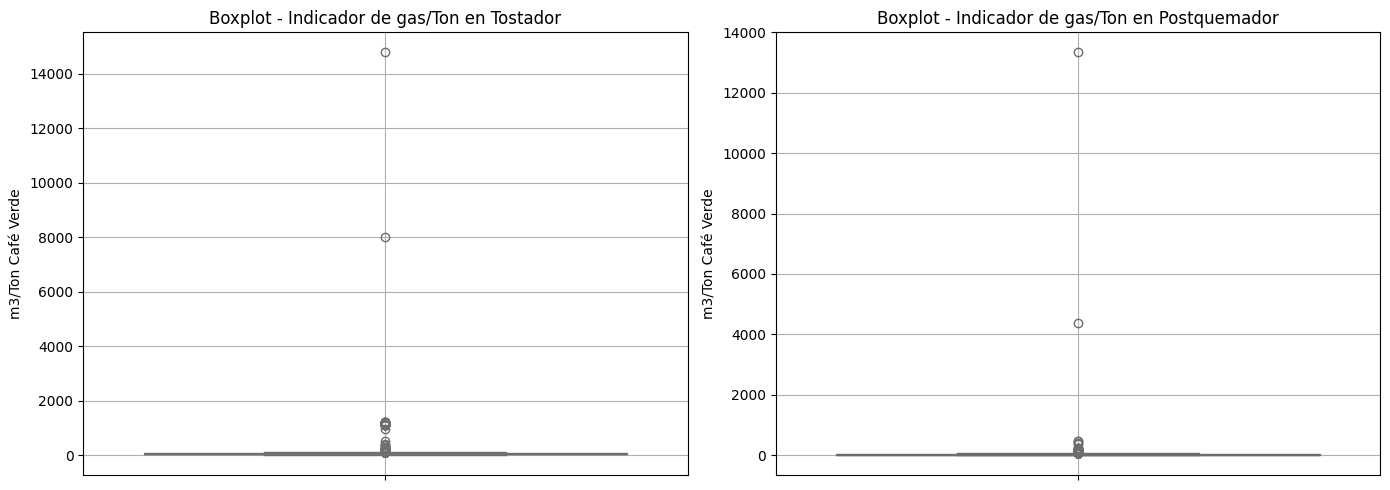

In [47]:
# --- Visualización de Boxplots para validación de datos ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))                                  #se crea una figura (fig) con 1 fila y 2 columnas (axs es una lista de ejes: axs[0] y axs[1] y tamaño (figsize=(alto, ancho)))
# Boxplot del Indicador de Gas en Tostador
sns.boxplot(data=df, y='Indicador_m3/Ton_Tost', ax=axs[0], color='skyblue')     #.bloxplot (grafico de cajas y bigotes), data(dataframe a usar), y='columna'(columna a graficar), ax=axs[0](primer recuerdo/eje), color(color de grafico)
axs[0].set_title('Boxplot - Indicador de gas/Ton en Tostador')                  #titulo principal
axs[0].set_ylabel('m3/Ton Café Verde')                                          #titulo eje y para cambiar el por defecto
axs[0].grid(True)                                                               #.grid(True)(mostrar cuadricula)

# Boxplot del Indicador de Gas en Postquemador
sns.boxplot(data=df, y='Indicador_m3/Ton_Post', ax=axs[1], color='salmon')      #.bloxplot (grafico de cajas y bigotes), data(dataframe a usar), y='columna'(columna a graficar), ax=axs[2](segundo recuerdo/eje), color(color de grafico)
axs[1].set_title('Boxplot - Indicador de gas/Ton en Postquemador')              #titulo principal
axs[1].set_ylabel('m3/Ton Café Verde')                                          #titulo eje y para cambiar el por defecto
axs[1].grid(True)                                                               #.grid(True)(mostrar cuadricula)

plt.tight_layout()                                                              #ajusta automaticamente el espaciado entre los subplots
# plt.show()                                                                      #muestra el grafico

Nos soportaremos tambíen en el siguiente dataframe para sacar conclusiones iniciales respecto a los Indicadores de consumo de gas por tonelada de café producidos en Tostador y Postquemador.

In [48]:
Estadisticas_Indicadores = df[['Indicador_m3/Ton_Tost', 'Indicador_m3/Ton_Post']].describe()
Estadisticas_Indicadores

,Indicador_m3/Ton_Tost,Indicador_m3/Ton_Post
count,188164.000000,188164.000000
mean,43.852725,15.118769
std,43.770158,36.375129
min,0.000000,0.000000
25%,27.882739,0.000000
50%,46.114288,13.747846
75%,55.723838,28.071039
max,14781.250733,13335.203926


Como se puede observar de la anterior tabla, los valores máximos alcanzados por los indicadores se observan muy alejados de la media e inclusive del 3er cuartil (Q3), es muy probable que estos valores tan altos estén relacionados con que el valor obtenido del café verde procesado. A veces el dato de la báscula toma valores muy cercanos a 0, producto de entre otras cosas de procedimientos  y parte del proceso . lo ideal sería aislar estos datos. Para ello utilizaremos la definición del rango intercuartilico (IQR) y lo aplicaremos al conjunto de datos.

- **Rango Intercuartílico (IQR):**Es una medida de dispersión estadística que se utiliza para evaluar la variabilidad en el rango intermedio de un conjunto de datos, excluyendo los valores atípicos o extremos.

Es decir, el rango intercuartílico es un indicador que nos permite acercarnos a la variabilidad de las observaciones que se encuentran cercanos a la mediana. Se calcula como la diferencia entre el primer y el tercer cuartil.

El rango intercuartílico es una medida más robusta que el rango tradicional, ya que se basa en los valores de los cuartiles en lugar de los valores máximo y mínimo del conjunto de datos.

Debemos recordar que los cuartiles son valores que dividen un conjunto de datos ordenados en cuatro partes iguales.

El primer cuartil (Q1) es el valor que deja atrás al 25% más bajo de los datos, el segundo cuartil (Q2) es equivalente a la mediana y el tercer cuartil (Q3) es el valor que deja atrás al 75% más bajo de los datos.


<center>
  <img src="https://drive.google.com/uc?export=view&id=1byLs8ebcdiV57wTWFaOXLHEHfREXCF9G" width="90%" alt="Imagen desde Drive">
</center>


Para ello creamos al inicio del Script una función llamada :  **Filtrado IQR**, se le aplicará al conjunto de datos y solo quedarán aquellos valores que estén entre el rango intercuartílico para el análisis de indicadores.

In [49]:
df_filtrado = fc.filtrado_IQR(df)
resumen, descartados = fc.resumen_descartes_por_tostador(df, df_filtrado)
resumen.head()

,Cantidad descartada,Proporción (%)
Tostador,,
TOSTADOR 1,33,49.25
TOSTADOR 5,14,20.90
TOSTADOR 4,9,13.43
TOSTADOR 2,6,8.96
TOSTADOR 3,4,5.97


In [50]:
df_filtrado.shape

(188097, 49)

In [51]:
resumen = resumen.reset_index()                                          #restaura los indices conservando el anterior como columna en este caso 'Tostador'
resumen.columns = ["Tostador", "Cantidad descartada", "Proporción (%)"]  #se renombran los nombres de las columnas, sin rename sino que es sobrescribiendo ya que no esta cambiando de antiguos a nuevos isno validando y definiendo un orden
resumen=resumen.sort_values(by="Cantidad descartada", ascending=False)   #se ordena la informacion de forma descendiente (mayor a menor)
resumen

,Tostador,Cantidad descartada,Proporción (%)
0,TOSTADOR 1,33,49.25
1,TOSTADOR 5,14,20.90
2,TOSTADOR 4,9,13.43
3,TOSTADOR 2,6,8.96
4,TOSTADOR 3,4,5.97
5,TOSTADOR 6,1,1.49


Información sobre la cantidad de datos atipicos y su representación sobre el total

In [52]:
# Con base en la anterior información, la cantidad de registros atipicos representan...
Atipicos = resumen['Cantidad descartada'].sum()
Atipicos_porcent = (resumen['Cantidad descartada'].sum() / df.shape[0]) * 100
print(f"Con base en la anterior información, la cantidad de registros descartados son:{Atipicos} lo cual representan el {Atipicos_porcent:.2f}% de los datos")

Con base en la anterior información, la cantidad de registros descartados son:67 lo cual representan el 0.04% de los datos


In [53]:
#se crea una copia del dataframe filtrado
df = df_filtrado.copy()

In [54]:
df.shape

(188097, 49)

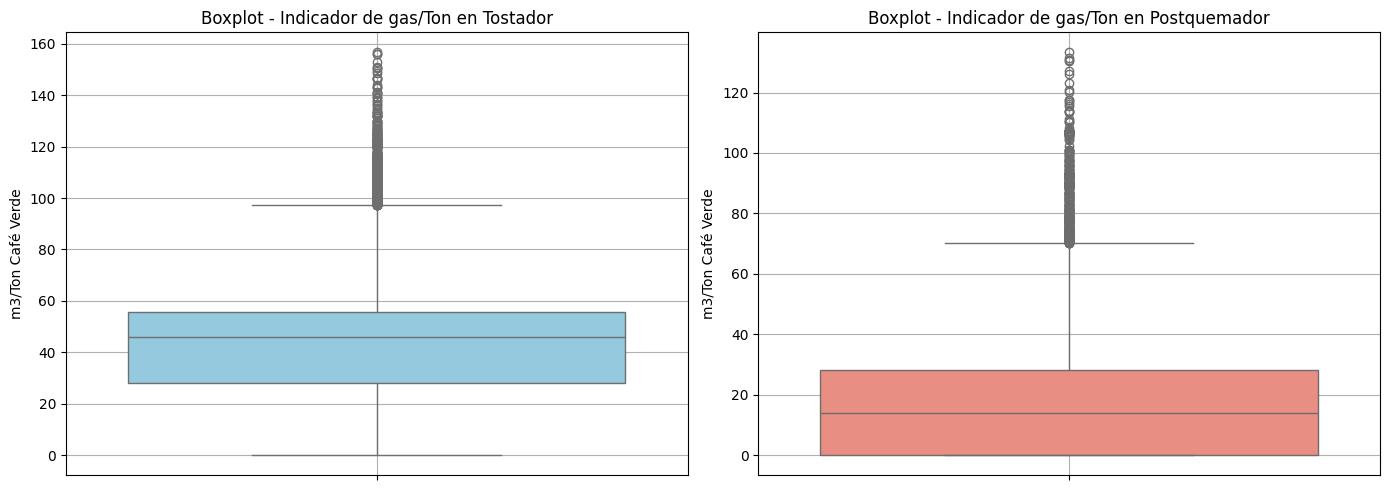

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# Boxplot del Indicador de Gas en Tostador
sns.boxplot(data=df, y='Indicador_m3/Ton_Tost', ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot - Indicador de gas/Ton en Tostador')
axs[0].set_ylabel('m3/Ton Café Verde')
axs[0].grid(True)

# Boxplot del Indicador de Gas en Postquemador
sns.boxplot(data=df, y='Indicador_m3/Ton_Post', ax=axs[1], color='salmon')
axs[1].set_title('Boxplot - Indicador de gas/Ton en Postquemador')
axs[1].set_ylabel('m3/Ton Café Verde')
axs[1].grid(True)

plt.tight_layout()
# plt.show()

###**Datos Inconsistentes**

Para analizar los datos inconsistentes, se tendrá en cuenta los tipos de datos de las columnas del dataframe. Mediante la función .dtypes que ya se visualizó con anterioridad, inicialmente no se observan inconsistencias en cuanto a los tipos de datos, es decir: las columnas que se espera sean numéricas están con formatos tipo float e int64, la columna de Fecha Hora ya está en el formato adecuado y todas las columnas de Cafe verde, Café tostado, etc..están en formato tipo float64. Por el momento y como columnas claves a verificar, se validará primero las columnas de "Tostador" y "Material" identificando inicialmente los valores únicos, teniendo en cuenta los espacios y las minusculas/mayusculas en los nombres de las anteriores columnas.

In [56]:
df.dtypes

Tostador                                         object
Material                                        float64
Orden                                             int64
Bache de Control                                  int64
Descripción de Material                          object
Lote                                             object
Entry                                            object
Destino Real                                     object
Fecha Hora                               datetime64[ns]
Tiempo Total  Tostion    (SEG )                   int64
Cafe Verde (KG)                                 float64
Cafe Tostado     (KG)                           float64
Cafe Tostado. Recal (KG)                        float64
Merma (%)                                       float64
Temperatura Critica  1\n(C °)                   float64
Temperatura Critica 2      (C °)                float64
Temperatura Critica 3       (C °)               float64
Tiempo Critico  1 (Seg)                         

In [57]:
columnas = ["Tostador ", "Material"]
informe = fc.analizar_inconsistencias_categoricas(df, columnas)  #es un diccionario de diccionarios


🧐 Análisis de la columna: Tostador 
----------------------------------------
Valores únicos (7): ['TOSTADOR 1' 'TOSTADOR 2' 'TOSTADOR 3' 'TOSTADOR 4' 'TOSTADOR 5'
 'TOSTADOR 6' 'TOSTADOR 7']
🔸 Valores nulos: 0

🔸 Conteo de valores tras limpieza (minúsculas y espacios):
Tostador 
tostador 7    52028
tostador 1    35862
tostador 6    29463
tostador 5    27088
tostador 3    24312
tostador 2    11813
tostador 4     7531
Name: count, dtype: int64

🧐 Análisis de la columna: Material
----------------------------------------
Valores únicos (141): [3002547. 3002552. 3002553. 3002556. 3002557. 3002567. 3002569. 3002570.
 3002571. 3002572. 3002855. 3002863. 3002874. 3007749. 3007755. 3008485.
 3010189. 3010661. 3012942. 3013169. 3014256. 3015866. 3018393. 3018964.
 3019385. 3019581. 3020154. 3020891. 3020952. 3021367. 3021635. 3021927.
 3021988. 3022369. 3023178. 3024240. 3024304. 3024305. 3024796. 3024832.
 3025050. 3025116. 3025247. 3025250. 3025252. 3025256. 3026674. 3027531.
 3027605. 302760

**Listado de Tostadores y Descripción de Materiales por Tostador**

In [58]:
combinaciones_unicas = df[['Tostador ', 'Descripción de Material']].drop_duplicates().reset_index(drop=True)
combinaciones_unicas.head(4)

,Tostador,Descripción de Material
0,TOSTADOR 1,Tostado Soluble COL
1,TOSTADOR 1,Tostado Soluble FCS
2,TOSTADOR 1,Tostado Soluble FCSO
3,TOSTADOR 1,Tostado Soluble FF


###**Tratamiento de los datos de consumo de gas desde ambiental**

**Proceso de extraccion de los datos para Tostador**

In [59]:
df_Total_amb, conteos = fc.consumo_gas_tostador(df_Ambiental)

In [60]:
df_Total_amb.loc[(df_Total_amb['Mes']=="Junio") & (df_Total_amb['Año']==2025) ]

,Fecha,Año,Mes,Dia,Consumo gas tostador,Consumo gas postquemador,Café verde,Tostador,Ciudad
1611,1/6/2025,2025.0,Junio,1.0,"1.928,1","525,9","35,4",TOSTADOR 1,Medellín
1612,2/6/2025,2025.0,Junio,2.0,"2.127,6","535,4","41,7",TOSTADOR 1,Medellín
1613,3/6/2025,2025.0,Junio,3.0,"2.128,3","371,5","39,9",TOSTADOR 1,Medellín
1614,4/6/2025,2025.0,Junio,4.0,"2.220,5","0,0","40,4",TOSTADOR 1,Medellín
1615,5/6/2025,2025.0,Junio,5.0,"2.187,0","0,0","35,3",TOSTADOR 1,Medellín
...,...,...,...,...,...,...,...,...,...
11477,26/6/2025,2025.0,Junio,26.0,"1.024,2",0,"43,7",TOSTADOR 7,Medellín
11478,27/6/2025,2025.0,Junio,27.0,"1.565,7",0,"49,5",TOSTADOR 7,Medellín
11479,28/6/2025,2025.0,Junio,28.0,"1.436,0",0,"40,1",TOSTADOR 7,Medellín
11480,29/6/2025,2025.0,Junio,29.0,"391,3",0,"0,0",TOSTADOR 7,Medellín


In [61]:
df_Total_amb.shape

(11482, 9)

In [62]:
df_Total_amb.head()

,Fecha,Año,Mes,Dia,Consumo gas tostador,Consumo gas postquemador,Café verde,Tostador,Ciudad
0,1/1/2021,2021.0,Enero,1.0,"1.404,7","760,3","0,0",TOSTADOR 1,Medellín
1,2/1/2021,2021.0,Enero,2.0,"554,2","336,9","19,2",TOSTADOR 1,Medellín
2,3/1/2021,2021.0,Enero,3.0,"1.171,1","624,3","18,0",TOSTADOR 1,Medellín
3,4/1/2021,2021.0,Enero,4.0,"1.873,4","997,6","53,9",TOSTADOR 1,Medellín
4,5/1/2021,2021.0,Enero,5.0,"2.159,0","973,7","33,9",TOSTADOR 1,Medellín


In [63]:
columnas_convertir = ['Consumo gas tostador', 'Consumo gas postquemador', 'Café verde']
df_no_convertibles, df_convertidos, df_Total_amb = fc.convertir_datos(df_Total_amb, columnas_convertir)

In [64]:
df_Tostadores_Totalizados_amb = df_Total_amb.groupby(['Fecha','Tostador']).agg({"Café verde": 'sum', "Consumo gas postquemador": 'sum',"Consumo gas tostador":'sum'}).reset_index()

In [65]:
df_Total_amb = fc.calcular_indicador(df_Total_amb, 'tostador', 'Consumo gas tostador', 'Consumo gas postquemador')

In [66]:
df_Tostadores_Totalizados_amb.head()

,Fecha,Tostador,Café verde,Consumo gas postquemador,Consumo gas tostador
0,1/1/2021,TOSTADOR 1,0.0,760.3,1404.7
1,1/1/2021,TOSTADOR 2,0.0,199.9,237.3
2,1/1/2021,TOSTADOR 3,0.0,255.7,899.6
3,1/1/2021,TOSTADOR 4,0.0,0.0,0.0
4,1/1/2021,TOSTADOR 5,0.0,664.5,1435.5


In [67]:
df_Tostadores_Totalizados_amb.shape

(11482, 5)

In [68]:
df_Total_amb.shape

(8417, 11)

In [69]:
df_no_convertibles.shape

(0, 9)

In [70]:
df_convertidos.shape

(11482, 9)

In [71]:
# Paso 6: Visualizar los resultados
print("Valores no convertibles:")
df_no_convertibles.head(5)

Valores no convertibles:


,Fecha,Año,Mes,Dia,Consumo gas tostador,Consumo gas postquemador,Café verde,Tostador,Ciudad


In [72]:
df_Total_amb.dtypes

Fecha                        object
Año                         float64
Mes                          object
Dia                         float64
Consumo gas tostador        float64
Consumo gas postquemador    float64
Café verde                  float64
Tostador                     object
Ciudad                       object
Indicador_m3/Ton_Tost       float64
Indicador_m3/Ton_Post       float64
dtype: object

In [73]:
df_Total_amb.head()

,Fecha,Año,Mes,Dia,Consumo gas tostador,Consumo gas postquemador,Café verde,Tostador,Ciudad,Indicador_m3/Ton_Tost,Indicador_m3/Ton_Post
1,2/1/2021,2021.0,Enero,2.0,554.2,336.9,19.2,TOSTADOR 1,Medellín,28.864583,17.546875
2,3/1/2021,2021.0,Enero,3.0,1171.1,624.3,18.0,TOSTADOR 1,Medellín,65.061111,34.683333
3,4/1/2021,2021.0,Enero,4.0,1873.4,997.6,53.9,TOSTADOR 1,Medellín,34.756957,18.508349
4,5/1/2021,2021.0,Enero,5.0,2159.0,973.7,33.9,TOSTADOR 1,Medellín,63.687316,28.722714
5,6/1/2021,2021.0,Enero,6.0,2155.6,996.5,46.5,TOSTADOR 1,Medellín,46.356989,21.430108


**Proceso de extraccion de los datos para Secado**

In [74]:
df_Total_amb_Secado, conteos = fc.consumo_gas_secador(df_Ambiental)

In [75]:
columnas_convertir = ['Consumo gas secador','Café verde']
df_no_convertibles, df_convertidos, df_Total_amb_Secado = fc.convertir_datos(df_Total_amb_Secado, columnas_convertir)

In [76]:
df_Total_amb_Secado = fc.calcular_indicador(df_Total_amb_Secado, 'secado', 'Consumo gas secador')

In [77]:
df_Total_amb_Secado.head()

,Fecha,Año,Mes,Dia,Consumo gas secador,Café verde,Secador,Ciudad,Indicador_m3/Ton_Secado
4,5/1/2021,2021.0,Enero,5.0,982.0,3.8,SECADOR 2,Medellín,258.421053
5,6/1/2021,2021.0,Enero,6.0,965.5,4.6,SECADOR 2,Medellín,209.891304
6,7/1/2021,2021.0,Enero,7.0,1024.1,4.2,SECADOR 2,Medellín,243.833333
7,8/1/2021,2021.0,Enero,8.0,1076.1,5.0,SECADOR 2,Medellín,215.220000
8,9/1/2021,2021.0,Enero,9.0,2175.7,5.3,SECADOR 2,Medellín,410.509434


**Proceso de extraccion de los datos para Aglomerado**

In [78]:
df_Total_amb_Aglomerado, conteos = fc.consumo_gas_aglomerado(df_Ambiental)

In [79]:
columnas_convertir = ['Consumo gas Aglomerador','Café verde']
df_no_convertibles, df_convertidos, df_Total_amb_Aglomerado = fc.convertir_datos(df_Total_amb_Aglomerado, columnas_convertir)

In [80]:
df_Total_amb_Aglomerado = fc.calcular_indicador(df_Total_amb_Aglomerado, 'aglomerado', 'Consumo gas Aglomerador')

In [81]:
df_Total_amb_Aglomerado.head()

,Fecha,Año,Mes,Dia,Consumo gas Aglomerador,Café verde,Aglomerador,Ciudad,Indicador_m3/Ton_Aglo
1,2/1/2021,2021.0,Enero,2.0,0.0,1.0,AGLOMERADOR 1,Medellín,0.0
2,3/1/2021,2021.0,Enero,3.0,0.0,3.4,AGLOMERADOR 1,Medellín,0.0
3,4/1/2021,2021.0,Enero,4.0,0.0,4.3,AGLOMERADOR 1,Medellín,0.0
4,5/1/2021,2021.0,Enero,5.0,0.0,3.7,AGLOMERADOR 1,Medellín,0.0
5,6/1/2021,2021.0,Enero,6.0,0.0,4.8,AGLOMERADOR 1,Medellín,0.0


**Calculo de los totalizados por dia**

In [82]:
# Columnas_Totalizados=["Fecha","Año","Mes","Dia","Tostador ","Consumo gas tostador","Consumo gas postquemador","Café verde"]
# df_Tostadores_Totalizados_amb = df_Total_amb.groupby(['Fecha','Tostador']).agg({"Café verde": 'sum', "Consumo gas postquemador": 'sum',"Consumo gas tostador":'sum'}).reset_index()  #.reset_index() para crear los indices y que fecha y tostador dejen de serlo gracias al groupby
# df_Tostadores_Totalizados_amb.head()

**Archivos de Consolidados de Gas-Tomados desde MES**

In [83]:
df_Tostion_MES_totales.dtypes

fecha_min = df_Tostion_MES_totales['Fecha'].min()
df_Tostion_MES_totales = df_Tostion_MES_totales[df_Tostion_MES_totales['Fecha'] != fecha_min]  #generalmente se hace cuando la primera fila tiene datos incompletos, valores nulos o de prueba, etc, se puede agregar algo para ver cuantas se eliminaron

**Generación del archivo de Fechas en formato CSV**

In [84]:
df_Fechas = fc.generar_fechas("2024-01-01")

#mostrar las primeras y últimas filas
df_Fechas.head()

,Fecha
0,01/01/2024
1,02/01/2024
2,03/01/2024
3,04/01/2024
4,05/01/2024


In [85]:
# df_Fechas.tail()

###**Consolidados**

In [86]:
#Estos datos corresponden a los datos importados desde MES , agregando columnas de Año ,Mes, , etc , pero sin realizar ningun tipo de filtros.
#Contiene los datos crudos provenientes del sistema MES, se aplico una limpieza y tranformacion basica para estandarizar y preparar la info modificando los valores atipicos con el promedio de los valores validos
df_sn_Filtros.to_csv(RUTA_BASE + 'Detalle_TostionMDE_TOTAL_csv.csv', index=False, decimal=',')

#Contiene lo mismo que df_sn_Filtros pero con los indicadores de consumo energetico e hidricos para analisis, eliminando valores atipicos (IQR) y dejando datos confiables
df.to_csv(RUTA_BASE + 'Detalle_TostionMDE_TOTAL_Tostadores_In_csv.csv', index=False, decimal=',')

#Contiene los datos crudos lo mismo de df_sn_Filtros agrupando por Fecha y Tostador
df_Tostadores_Totalizados.to_csv(RUTA_BASE + 'Datos_Totalizados_MES_csv.csv', index=False, decimal=',')

#Contiene datos crudos directamente exportados del sistema MES tomando todos los datos menos la fecha minima
df_Tostion_MES_totales.to_csv(RUTA_BASE + 'Consumos_MES_csv.csv', index=False, decimal=',')

#Consolidado del consumo energetico de Tostador y postquemadores haciendo limpieza basica e integrandolos en un solo dataframe agregando algunas columnas para generar los indicadores de consumo energetico
df_Total_amb.to_csv(RUTA_BASE + 'Consumos_Gas_Tostion_csv.csv', index=False, decimal=',')

#Consolidado de consumo energetico de Secador haciendo limpieza basica e integrandolos en un solo dataframe agregando algunas columnas para generar los indicadores de consumo energetico
df_Total_amb_Secado.to_csv(RUTA_BASE + 'Consumos_Gas_Secado_csv.csv', index=False, decimal=',')

#Consolidado de consumo energetico de Aglomerado haciendo limpieza basica e integrandolos en un solo dataframe agregando algunas columnas para generar los indicadores de consumo energetico
df_Total_amb_Aglomerado.to_csv(RUTA_BASE + 'Consumos_Gas_Aglomerado_csv.csv', index=False, decimal=',')

#Consolidado df Total_amb pero agrupado por Fecha y Tostador sumando el consumo de gas postquemador, tostados y cantidad de cafe verde(resumen diario de lo que hizo cada tostador con respecto a energia y cafe procesado)
df_Tostadores_Totalizados_amb.to_csv(RUTA_BASE + 'Tostadores_Totalizados_Amb.csv', index=False, decimal=',')

#Se utiliza para identificar las combinaciones unicas existentes entre cada tostador y el materil(producto) que ha procesado
combinaciones_unicas.to_csv(RUTA_BASE + 'Tostador_Material.csv', index=False, decimal=',')

#Archivo de fechas desde 01-01-2024 hasta la fecha actual
df_Fechas.to_csv(RUTA_BASE + 'Fechas_csv.csv', index=False)

#Consolidado que contabiliza los bache o interrupciones que tuvo cada tostador (cada vez que el proceso no registro consumo o tuvo perdida continua de datos)
df_conteo_baches_perdidos.to_csv(RUTA_BASE + 'Conteo_Baches_Perdidos.csv', index=False)

In [87]:
print(df_sn_Filtros.shape)
print(df.shape)
print(df_Tostadores_Totalizados.shape)
print(df_Tostion_MES_totales.shape)
print(df_Total_amb.shape)
print(df_Total_amb_Secado.shape)
print(df_Total_amb_Aglomerado.shape)
print(df_Tostadores_Totalizados_amb.shape)
print(combinaciones_unicas.shape)
print(df_Fechas.shape)
print(df_conteo_baches_perdidos.shape)

(188164, 44)
(188097, 49)
(2872, 12)
(53136, 13)
(8417, 11)
(4348, 9)
(1738, 9)
(11482, 5)
(449, 2)
(597, 1)
(2872, 3)


In [88]:
df_sn_Filtros.head()

,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,Tiempo Total Tostion (SEG ),...,Gas Tostador Calentamiento (m3),Gas Postquemador Calentamiento (m3),Energía Electrica Calentamiento (kWh),Año,Dia,Mes_Numero,Mes,Hora,Turnos,Fecha
0,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,863,...,NaN,NaN,NaN,2024,2,1,Enero,12,Turno 1 (6am -2pm),2024-01-02
1,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,858,...,NaN,NaN,NaN,2024,2,1,Enero,12,Turno 1 (6am -2pm),2024-01-02
2,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,1071,...,NaN,NaN,NaN,2024,2,1,Enero,13,Turno 1 (6am -2pm),2024-01-02
3,TOSTADOR 1,3002547.0,26277032,50811,Tostado Soluble COL,CM240102,Entry_{(3187362)},CM,2024-01-02 13:53:57,904,...,NaN,NaN,NaN,2024,2,1,Enero,13,Turno 1 (6am -2pm),2024-01-02
4,TOSTADOR 1,3002547.0,26277032,50849,Tostado Soluble COL,CM240103,Entry_{(3187370)},CM,2024-01-03 03:27:23,901,...,NaN,NaN,NaN,2024,3,1,Enero,3,Turno III (10pm -6am),2024-01-03


In [89]:
df.head()

,Tostador,Material,Orden,Bache de Control,Descripción de Material,Lote,Entry,Destino Real,Fecha Hora,Tiempo Total Tostion (SEG ),...,Mes_Numero,Mes,Hora,Turnos,Fecha,Indicador_kWh/Ton,Indicador_m3/Ton_Tost,Indicador_m3/Ton_Post,Indicador_m3/Ton_Total,Indicador_Lts/Ton
0,TOSTADOR 1,3002547.0,26277032,50805,Tostado Soluble COL,CM240102,Entry_{(3187356)},CM,2024-01-02 12:19:17,863,...,1,Enero,12,Turno 1 (6am -2pm),2024-01-02,10.507812,54.925785,25.060546,79.986331,80.000000
1,TOSTADOR 1,3002547.0,26277032,50806,Tostado Soluble COL,CM240102,Entry_{(3187357)},CM,2024-01-02 12:39:57,858,...,1,Enero,12,Turno 1 (6am -2pm),2024-01-02,11.088206,51.876407,24.515084,76.391491,79.960018
2,TOSTADOR 1,3002547.0,26277032,50810,Tostado Soluble COL,CM240102,Entry_{(3187361)},CM,2024-01-02 13:39:09,1071,...,1,Enero,13,Turno 1 (6am -2pm),2024-01-02,12.512512,50.945477,24.551894,75.497371,80.080079
3,TOSTADOR 1,3002547.0,26277032,50811,Tostado Soluble COL,CM240102,Entry_{(3187362)},CM,2024-01-02 13:53:57,904,...,1,Enero,13,Turno 1 (6am -2pm),2024-01-02,15.085668,56.969896,31.474722,88.444618,80.040022
4,TOSTADOR 1,3002547.0,26277032,50849,Tostado Soluble COL,CM240103,Entry_{(3187370)},CM,2024-01-03 03:27:23,901,...,1,Enero,3,Turno III (10pm -6am),2024-01-03,12.776632,50.907260,26.133486,77.040746,80.020006


In [90]:
df_Tostadores_Totalizados.head()

,Fecha,Tostador,Cafe Verde (KG),Gas Postquemador M3,Gas Tostador M3,Tiempo Arranque (Seg),Gas Tostador Arranque (m3),Gas Postquemador Arranque (m3),Energía Electrica Arranque (kWh),Tiempo calentamiento (Seg),Gas Tostador Calentamiento (m3),Energía Electrica Calentamiento (kWh)
0,2024-01-02,TOSTADOR 1,17457.500031,450.663260,891.510977,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,TOSTADOR 2,6087.499985,142.340617,385.349977,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-02,TOSTADOR 3,5116.000000,151.593743,333.637484,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-02,TOSTADOR 5,1350.000000,28.366405,68.329691,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-02,TOSTADOR 6,11420.100067,472.079719,293.369879,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df_Tostion_MES_totales.head()

,Centro,Fecha,Año,Mes,Dia,Hora,Tostador,Tostador gas,Postquemador gas,Agua,Energia,Mes_T,Turnos
144,CM10,2024-08-14,2024,8,14,00:00:00,Tostador 1,0.000,0.000,0,0,Agosto,Turno III (10pm -6am)
145,CM10,2024-08-14,2024,8,14,00:00:00,Tostador 2,0.000,0.000,0,0,Agosto,Turno III (10pm -6am)
146,CM10,2024-08-14,2024,8,14,00:00:00,Tostador 3,26.064,15.766,0,0,Agosto,Turno III (10pm -6am)
147,CM10,2024-08-14,2024,8,14,00:00:00,Tostador 4,13.321,0.000,0,0,Agosto,Turno III (10pm -6am)
148,CM10,2024-08-14,2024,8,14,00:00:00,Tostador 5,79.266,38.488,0,0,Agosto,Turno III (10pm -6am)


In [92]:
df_Total_amb.head()

,Fecha,Año,Mes,Dia,Consumo gas tostador,Consumo gas postquemador,Café verde,Tostador,Ciudad,Indicador_m3/Ton_Tost,Indicador_m3/Ton_Post
1,2/1/2021,2021.0,Enero,2.0,554.2,336.9,19.2,TOSTADOR 1,Medellín,28.864583,17.546875
2,3/1/2021,2021.0,Enero,3.0,1171.1,624.3,18.0,TOSTADOR 1,Medellín,65.061111,34.683333
3,4/1/2021,2021.0,Enero,4.0,1873.4,997.6,53.9,TOSTADOR 1,Medellín,34.756957,18.508349
4,5/1/2021,2021.0,Enero,5.0,2159.0,973.7,33.9,TOSTADOR 1,Medellín,63.687316,28.722714
5,6/1/2021,2021.0,Enero,6.0,2155.6,996.5,46.5,TOSTADOR 1,Medellín,46.356989,21.430108


In [93]:
df_Total_amb_Secado.head()

,Fecha,Año,Mes,Dia,Consumo gas secador,Café verde,Secador,Ciudad,Indicador_m3/Ton_Secado
4,5/1/2021,2021.0,Enero,5.0,982.0,3.8,SECADOR 2,Medellín,258.421053
5,6/1/2021,2021.0,Enero,6.0,965.5,4.6,SECADOR 2,Medellín,209.891304
6,7/1/2021,2021.0,Enero,7.0,1024.1,4.2,SECADOR 2,Medellín,243.833333
7,8/1/2021,2021.0,Enero,8.0,1076.1,5.0,SECADOR 2,Medellín,215.220000
8,9/1/2021,2021.0,Enero,9.0,2175.7,5.3,SECADOR 2,Medellín,410.509434


In [94]:
df_Total_amb_Aglomerado.head()

,Fecha,Año,Mes,Dia,Consumo gas Aglomerador,Café verde,Aglomerador,Ciudad,Indicador_m3/Ton_Aglo
1,2/1/2021,2021.0,Enero,2.0,0.0,1.0,AGLOMERADOR 1,Medellín,0.0
2,3/1/2021,2021.0,Enero,3.0,0.0,3.4,AGLOMERADOR 1,Medellín,0.0
3,4/1/2021,2021.0,Enero,4.0,0.0,4.3,AGLOMERADOR 1,Medellín,0.0
4,5/1/2021,2021.0,Enero,5.0,0.0,3.7,AGLOMERADOR 1,Medellín,0.0
5,6/1/2021,2021.0,Enero,6.0,0.0,4.8,AGLOMERADOR 1,Medellín,0.0


In [95]:
df_Tostadores_Totalizados_amb.head()

,Fecha,Tostador,Café verde,Consumo gas postquemador,Consumo gas tostador
0,1/1/2021,TOSTADOR 1,0.0,760.3,1404.7
1,1/1/2021,TOSTADOR 2,0.0,199.9,237.3
2,1/1/2021,TOSTADOR 3,0.0,255.7,899.6
3,1/1/2021,TOSTADOR 4,0.0,0.0,0.0
4,1/1/2021,TOSTADOR 5,0.0,664.5,1435.5


In [96]:
combinaciones_unicas.head()

,Tostador,Descripción de Material
0,TOSTADOR 1,Tostado Soluble COL
1,TOSTADOR 1,Tostado Soluble FCS
2,TOSTADOR 1,Tostado Soluble FCSO
3,TOSTADOR 1,Tostado Soluble FF
4,TOSTADOR 1,Tostado Soluble FFO


In [97]:
df_Fechas.head()

,Fecha
0,01/01/2024
1,02/01/2024
2,03/01/2024
3,04/01/2024
4,05/01/2024


In [98]:
df_Fechas.tail()

,Fecha
592,15/08/2025
593,16/08/2025
594,17/08/2025
595,18/08/2025
596,19/08/2025


In [99]:
df_conteo_baches_perdidos.head()

,Fecha,Tostador,# Baches perdidos
0,2024-01-02,TOSTADOR 1,0
1,2024-01-02,TOSTADOR 2,0
2,2024-01-02,TOSTADOR 3,0
3,2024-01-02,TOSTADOR 5,0
4,2024-01-02,TOSTADOR 6,3
